<a href="https://colab.research.google.com/github/Rio-HEPLab/EAFEXP2025/blob/main/FAST_scan_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [46]:
fileName = "scan_X_11022025-1.txt"

step_X = None
step_Y = None
arr = None
with open( fileName, 'r' ) as file_:
    line_ = file_.readline()
    p_ = re.compile( 'Step X = *' )
    m_ = p_.match( line_ )
    if m_: step_X = float( line_[ m_.end() : ].replace( ',', '.' ) )
    print( "step X = {}".format( step_X ) )
    line_ = file_.readline()
    p_ = re.compile( 'Step Y = *' )
    m_ = p_.match( line_ )
    if m_: step_Y = float( line_[ m_.end() : ].replace( ',', '.' ) )
    print( "step Y = {}".format( step_Y ) )
    arr = np.loadtxt( file_ )
arr

step X = 0.01
step Y = 0.05


array([[ 53.,  49.,  49.,  50.,  50.,  47.,  51.,  45.,  46.,  47.,  48.,
         49.,  49.,  46.,  48.,  48.,  46.,  49.,  48.,  53.,  55.,  59.,
         71.,  82., 104., 108., 123., 145., 161., 184., 192., 227., 249.,
        262., 264., 277., 265., 258., 258., 243., 243.],
       [ 48.,  48.,  48.,  50.,  47.,  49.,  48.,  49.,  49.,  49.,  48.,
         47.,  46.,  52.,  50.,  52.,  51.,  61.,  59.,  58.,  68.,  85.,
         96., 111., 135., 165., 192., 209., 237., 275., 298., 367., 357.,
        414., 421., 429., 427., 425., 416., 406., 415.]])

In [47]:
n_X = arr.shape[1]
n_Y = arr.shape[0]
print ( arr.shape )
print ( n_X, n_Y )

(2, 41)
41 2


In [63]:
i_meas_Y = 1
arr_1D_Y = arr[ i_meas_Y , : ]
# arr_1D_Y = arr_1D_Y / arr_1D_Y.max()
arr_1D_Y

array([ 48.,  48.,  48.,  50.,  47.,  49.,  48.,  49.,  49.,  49.,  48.,
        47.,  46.,  52.,  50.,  52.,  51.,  61.,  59.,  58.,  68.,  85.,
        96., 111., 135., 165., 192., 209., 237., 275., 298., 367., 357.,
       414., 421., 429., 427., 425., 416., 406., 415.])

In [64]:
arr_1D_X = np.arange( n_X ) * step_X
arr_1D_X

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

Text(0, 0.5, 'Amplitude (u.a.)')

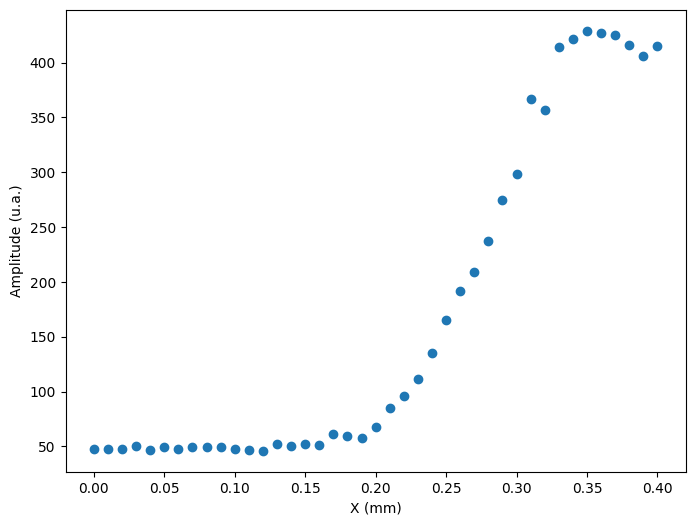

In [65]:
fig = plt.figure( figsize=(8,6) )
plt.plot( arr_1D_X, arr_1D_Y, 'o' )
plt.xlabel( 'X (mm)' )
plt.ylabel( 'Amplitude (u.a.)' )

In [80]:
from scipy.special import erf

def s_curve( x, *pars ):
    return pars[0] + pars[1] * 0.5 * ( 1 + erf( ( x - pars[2] ) / ( np.sqrt(2) * pars[3] ) ) )


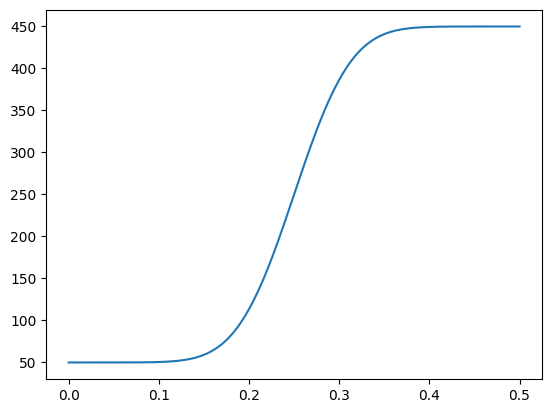

In [91]:
X_ = np.linspace(0.,0.50,200)
pars = [ 50, 400, 0.25, 0.05 ]
plt.plot( X_, s_curve( X_, *pars ) )

In [84]:
}from scipy.optimize import curve_fit

p0 = ( 0., 100., 0.10, 0.10)

popt_, pcov_ = curve_fit( s_curve, arr_1D_X, arr_1D_Y, p0=p0 )

print ( popt_ ) # Valores otimizados dos parâmetros
print ( pcov_ ) # Matriz de covariância


[5.02030554e+01 3.79298084e+02 2.75870577e-01 4.41858254e-02]
[[ 5.98007843e+00 -7.47395895e+00  9.27276134e-04 -1.73504607e-03]
 [-7.47395895e+00  3.67004414e+01  4.47141909e-03  8.42153910e-03]
 [ 9.27276134e-04  4.47141909e-03  2.53475869e-06  1.01791661e-06]
 [-1.73504607e-03  8.42153910e-03  1.01791661e-06  4.39789938e-06]]


In [90]:
print ( "mean = {:.4f} ± {:.4f} mm".format( popt_[2], np.sqrt( pcov_[2,2] ) ) )
print ( "sigma = {:.4f} ± {:.4f} mm".format( popt_[3], np.sqrt( pcov_[2,3] ) ) )

mean = 0.2759 ± 0.0016 mm
sigma = 0.0442 ± 0.0010 mm


Text(0, 0.5, 'Amplitude (u.a.)')

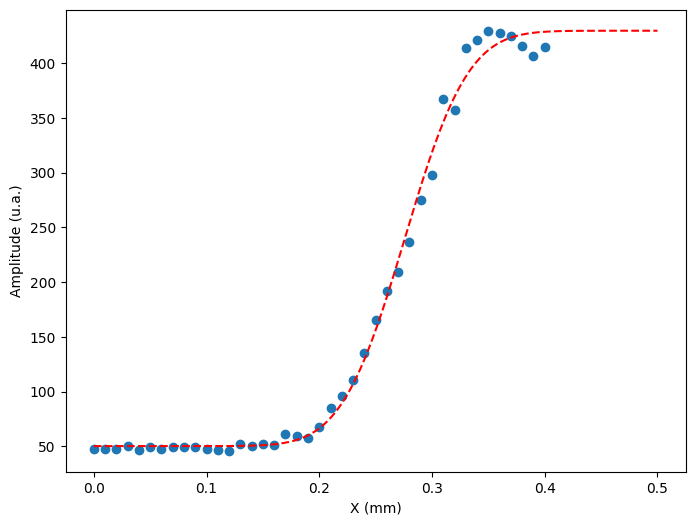

In [94]:
fig = plt.figure( figsize=(8,6) )

plt.plot( arr_1D_X, arr_1D_Y, 'o' )

X_ = np.linspace(0.,0.50,200)
plt.plot( X_, s_curve( X_, *popt_ ), color='red', linestyle='dashed' )

plt.xlabel( 'X (mm)' )
plt.ylabel( 'Amplitude (u.a.)' )
